In [1]:
# Set your data
student_number = '401105989'
Name = 'Amirhosein'
Last_Name = 'Rezaei'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
"""
In this homework, you will implement and compare different numerical methods for solving
ordinary differential equations (ODEs). Specifically, you will implement the following methods:

1. Euler Method
2. Heun's Method (Modified Euler Method)
3. Backward Euler Method
4. Runge-Kutta 4th Order Method
5. Adams-Bashforth Method
"""

def f(x, y):
    return -2 * y

# Initial conditions
x0 = 0
y0 = 1
xn = 5
h = 0.1

In [4]:
"""
### Euler Method:
The Euler method uses the formula:

    y_(n+1) = y_n + h * f(x_n, y_n)

Your task: Implement the Euler method to solve the given ODE.
"""

def euler_method(f, x0, y0, xn, h):
    x_values = np.arange(x0, xn + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])

    return x_values, y_values

In [5]:
"""
### Heun's Method:
This method improves upon Euler's method by using the average of the slopes at the beginning and end
of the interval:

    y^* = y_n + h * f(x_n, y_n)  (Predictor step)
    y_(n+1) = y_n + h/2 * [f(x_n, y_n) + f(x_(n+1), y^*)]  (Corrector step)

Your task: Implement Heun's method to solve the given ODE.
"""

def heun_method(f, x0, y0, xn, h):
    x_values = np.arange(x0, xn + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        predictor = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])
        y_values[i] = y_values[i-1] + h/2 * (f(x_values[i-1], y_values[i-1]) + f(x_values[i], predictor))

    return x_values, y_values

In [6]:
"""
### Backward Euler Method:
Backward Euler is an implicit method that solves the equation:

    y_(n+1) = y_n + h * f(x_(n+1), y_(n+1))

This requires solving a nonlinear equation for y_(n+1). For simplicity, we'll use fixed-point
iteration to approximate the solution.

Your task: Implement the Backward Euler method to solve the given ODE.
"""

def backward_euler_method(f, x0, y0, xn, h, max_iter=10, tol=1e-6):
    x_values = np.arange(x0, xn + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        y_guess = y_values[i-1]
        for _ in range(max_iter):
            y_next = y_values[i-1] + h * f(x_values[i], y_guess)
            if abs(y_next - y_guess) < tol:
                break
            y_guess = y_next
        y_values[i] = y_guess

    return x_values, y_values

In [7]:
"""
### Runge-Kutta 4th Order Method:
The RK4 method calculates y_(n+1) using four intermediate slopes:

    k1 = h * f(x_n, y_n)
    k2 = h * f(x_n + h/2, y_n + k1/2)
    k3 = h * f(x_n + h/2, y_n + k2/2)
    k4 = h * f(x_n + h, y_n + k3)
    y_(n+1) = y_n + (k1 + 2*k2 + 2*k3 + k4) / 6

Your task: Implement the Runge-Kutta 4th Order method to solve the ODE.
"""

def runge_kutta_4(f, x0, y0, xn, h):
    x_values = np.arange(x0, xn + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        k1 = h * f(x_values[i-1], y_values[i-1])
        k2 = h * f(x_values[i-1] + h/2, y_values[i-1] + k1/2)
        k3 = h * f(x_values[i-1] + h/2, y_values[i-1] + k2/2)
        k4 = h * f(x_values[i-1] + h, y_values[i-1] + k3)
        y_values[i] = y_values[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return x_values, y_values

In [8]:
"""
### Adams-Bashforth Method:
Adams-Bashforth methods are explicit multistep methods. For the 2-step Adams-Bashforth method:

    y_(n+1) = y_n + h * [3/2 * f(x_n, y_n) - 1/2 * f(x_(n-1), y_(n-1))]

This requires at least two initial values, which can be computed using another method (e.g., Euler or RK4).

Your task: Implement the 2-step Adams-Bashforth method to solve the ODE.
"""

def adams_bashforth_2(f, x0, y0, xn, h):
    x_values = np.arange(x0, xn + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0
    y_values[1] = y_values[0] + h * f(x_values[0], y_values[0])

    for i in range(2, len(x_values)):
        y_values[i] = y_values[i-1] + h * (3/2 * f(x_values[i-1], y_values[i-1]) - 1/2 * f(x_values[i-2], y_values[i-2]))

    return x_values, y_values

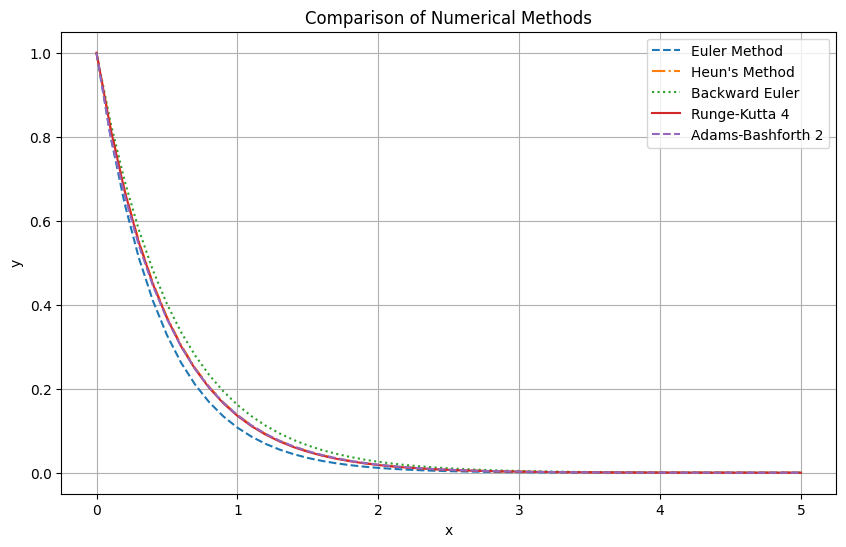

In [9]:
x_euler, y_euler = euler_method(f, x0, y0, xn, h)
x_heun, y_heun = heun_method(f, x0, y0, xn, h)
x_backward_euler, y_backward_euler = backward_euler_method(f, x0, y0, xn, h)
x_rk4, y_rk4 = runge_kutta_4(f, x0, y0, xn, h)
x_ab, y_ab = adams_bashforth_2(f, x0, y0, xn, h)

plt.figure(figsize=(10, 6))
plt.plot(x_euler, y_euler, label="Euler Method", linestyle="--")
plt.plot(x_heun, y_heun, label="Heun's Method", linestyle="-.")
plt.plot(x_backward_euler, y_backward_euler, label="Backward Euler", linestyle=":")
plt.plot(x_rk4, y_rk4, label="Runge-Kutta 4", linestyle="-")
plt.plot(x_ab, y_ab, label="Adams-Bashforth 2", linestyle="--")
plt.title("Comparison of Numerical Methods")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()